In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install tensorflow --quiet

In [ ]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten, GRU
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [ ]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [ ]:
# Read in the Gold dataset from a CSV file
df=pd.read_csv("/content/drive/MyDrive/Dataset/Gold Futures Historical Data.csv")
df=df.set_index(pd.DatetimeIndex(df['Date'].values))


# Preprocessing Data

---

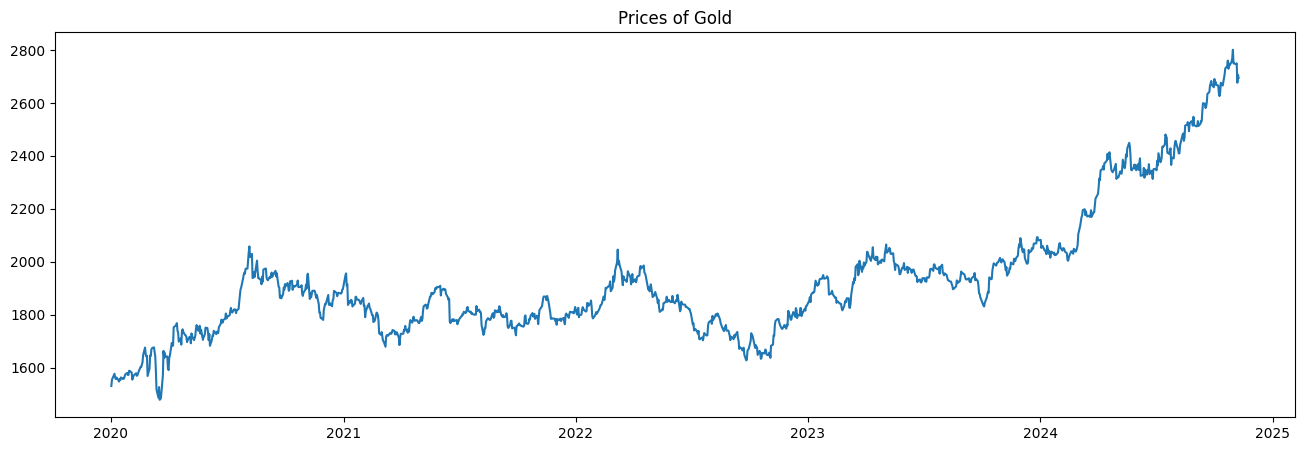

In [ ]:
# Format column Date
df.index = pd.to_datetime(df.index,format='%m/%d/%Y')

# Format column Price to float
df['Price'] = df.Price.str.replace(',','').astype(float)

# Flip the column
df = df.iloc[::-1]

# Create new Dataframe
df1 = pd.DataFrame(df, columns=['Date', 'Price'])
df1.drop('Date', axis = 1, inplace = True)

# Plot the 'price' column of the 'df' DataFrame
plt.figure(figsize=(16,5))
plt.plot(df1['Price'])
plt.title('Prices of Gold')
plt.show()

# Split dataset (7-2-1)

---



In [ ]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [ ]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(5, len(train_data)):
    # Append the last 5 values to the x_train array
    x_train.append(sc_train[i-5:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [ ]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [ ]:
# Build the model
model = Sequential()

# Add an GRU layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(GRU(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an GRU layer with 50 units
model.add(GRU(50,return_sequences=True))

# Add an GRU layer with 50 units
model.add(GRU(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.keras' # Changed the file extension to .keras

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.07203, saving model to save_model_7_2_1.keras
18/18 - 6s - 325ms/step - loss: 0.0720
Epoch 2/80

Epoch 2: loss improved from 0.07203 to 0.02985, saving model to save_model_7_2_1.keras
18/18 - 0s - 15ms/step - loss: 0.0298
Epoch 3/80

Epoch 3: loss improved from 0.02985 to 0.01797, saving model to save_model_7_2_1.keras
18/18 - 0s - 17ms/step - loss: 0.0180
Epoch 4/80

Epoch 4: loss did not improve from 0.01797
18/18 - 0s - 21ms/step - loss: 0.0185
Epoch 5/80

Epoch 5: loss improved from 0.01797 to 0.01731, saving model to save_model_7_2_1.keras
18/18 - 1s - 38ms/step - loss: 0.0173
Epoch 6/80

Epoch 6: loss improved from 0.01731 to 0.01687, saving model to save_model_7_2_1.keras
18/18 - 1s - 36ms/step - loss: 0.0169
Epoch 7/80

Epoch 7: loss improved from 0.01687 to 0.01628, saving model to save_model_7_2_1.keras
18/18 - 0s - 23ms/step - loss: 0.0163
Epoch 8/80

Epoch 9: loss did not improve from 0.01628
18/18 - 0s - 21ms/step - loss: 0.0169
Epoch 

In [ ]:
# Load the best model from the save_model_7_2_1.keras file
final_model = load_model('save_model_7_2_1.keras') # Changed the filename to match the saved model

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [ ]:
# Preprocess the test data
test = df1[len(train_data)-5:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(5, test.shape[0]):
    x_test.append(sc_test[i-5:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
# Preprocess the validate data
val = df1[train_size+test_size-5:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(5, val.shape[0]):
    x_val.append(sc_val[i-5:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [ ]:
# Dự báo dữ liệu test, val
train_predict=model.predict(x_train)
y_pred=model.predict(x_test)
y_pred_val=model.predict(x_val)

# Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=sc.inverse_transform(train_predict)
y_pred=sc.inverse_transform(y_pred)
y_pred_val=sc.inverse_transform(y_pred_val)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [ ]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 5:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 5)
[0.9586801876797333, 0.9613288935976989, 0.9057817466323597, 0.9281065536552142, 0.9197820493416073]


In [ ]:
# Initialize variables
lst_output = []
n_steps = 5
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 5):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.9196045994758606], [0.9215864539146423], [0.9224539399147034], [0.9232858419418335], [0.9239110350608826], [0.9245103001594543], [0.925157368183136], [0.9258221983909607], [0.9264869093894958], [0.9271440505981445], [0.9277942180633545], [0.9284402132034302], [0.9290831685066223], [0.9297229647636414], [0.9303593635559082], [0.9309920072555542], [0.9316211938858032], [0.9322468638420105], [0.9328687787055969], [0.9334871768951416], [0.9341018795967102], [0.9347133040428162], [0.9353212118148804], [0.9359254240989685], [0.9365262389183044], [0.9371235370635986], [0.9377171993255615], [0.9383072853088379], [0.9388936758041382], [0.9394767880439758]]


In [ ]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['Date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[2694.56551775]
 [2697.1843402 ]
 [2698.3306362 ]
 [2699.42991154]
 [2700.25604173]
 [2701.04791063]
 [2701.90294632]
 [2702.78145295]
 [2703.65980207]
 [2704.52814846]
 [2705.38727975]
 [2706.24089773]
 [2707.09049886]
 [2707.93592564]
 [2708.776863  ]
 [2709.61283839]
 [2710.4442456 ]
 [2711.27100588]
 [2712.09280418]
 [2712.90995555]
 [2713.7222237 ]
 [2714.53015996]
 [2715.33344929]
 [2716.1318554 ]
 [2716.92577211]
 [2717.71504188]
 [2718.49950719]
 [2719.27924681]
 [2720.05410321]
 [2720.82462772]]


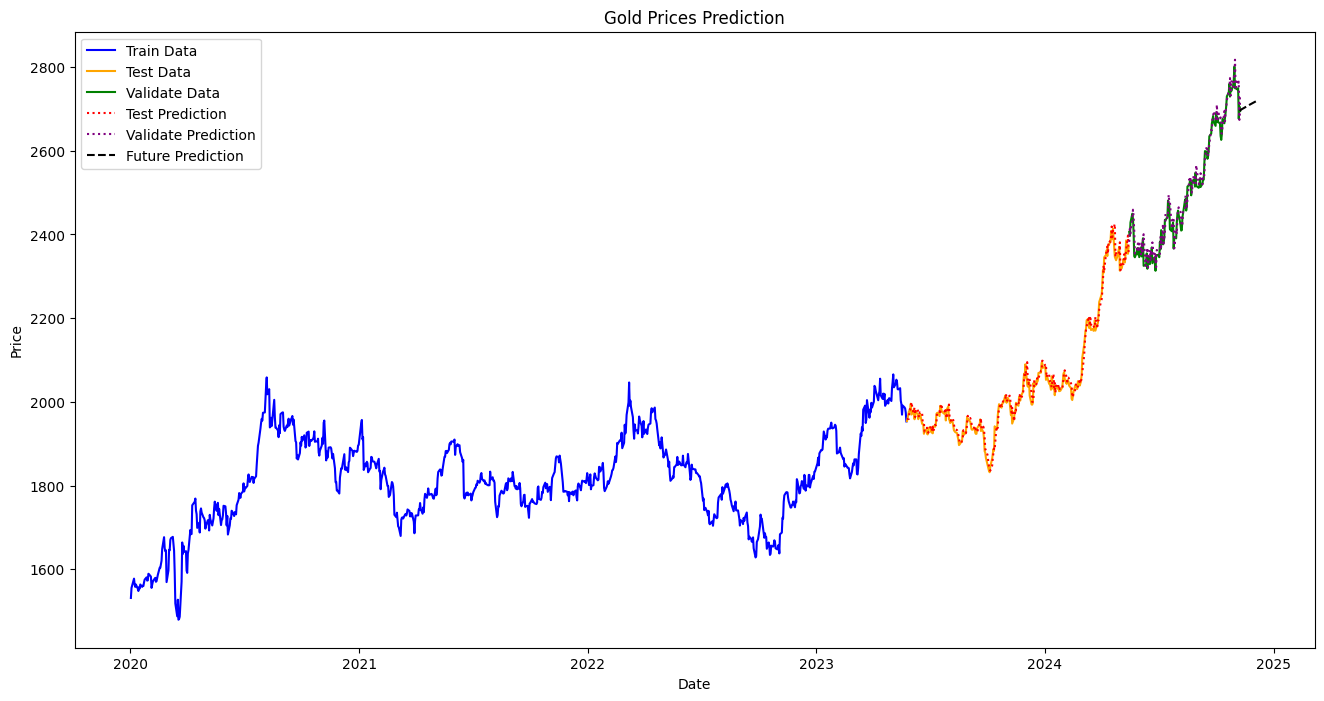

In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['Price'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['Price'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['Price'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

In [ ]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  12.577105761718745
MAPE:  0.6116247081848801
RMSE:  16.84238683736232

** Validate **
MAE:  20.381594103715553
MAPE:  0.8203479815548201
RMSE:  26.57367490341633


# Split dataset (6-3-1)

---



In [ ]:
# Split the data
train_size = int(0.6 * len(sc_train))
test_size = int(0.3 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [ ]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(5, len(train_data)):
    # Append the last 5 values to the x_train array
    x_train.append(sc_train[i-5:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [ ]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [ ]:
# Build the model
model = Sequential()

# Add an GRU layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(GRU(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an GRU layer with 50 units
model.add(GRU(50,return_sequences=True))

# Add an GRU layer with 50 units
model.add(GRU(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
# Changed the extension from .hdf5 to .keras
save_model = 'save_model_6_3_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.09799, saving model to save_model_6_3_1.keras
15/15 - 6s - 432ms/step - loss: 0.0980
Epoch 2/80

Epoch 2: loss improved from 0.09799 to 0.04745, saving model to save_model_6_3_1.keras
15/15 - 0s - 23ms/step - loss: 0.0474
Epoch 3/80

Epoch 3: loss improved from 0.04745 to 0.03507, saving model to save_model_6_3_1.keras
15/15 - 0s - 25ms/step - loss: 0.0351
Epoch 4/80

Epoch 4: loss improved from 0.03507 to 0.02308, saving model to save_model_6_3_1.keras
15/15 - 1s - 41ms/step - loss: 0.0231
Epoch 5/80

Epoch 5: loss improved from 0.02308 to 0.01733, saving model to save_model_6_3_1.keras
15/15 - 1s - 49ms/step - loss: 0.0173
Epoch 6/80

Epoch 6: loss improved from 0.01733 to 0.01712, saving model to save_model_6_3_1.keras
15/15 - 0s - 33ms/step - loss: 0.0171
Epoch 7/80

Epoch 7: loss improved from 0.01712 to 0.01652, saving model to save_model_6_3_1.keras
15/15 - 0s - 27ms/step - loss: 0.0165
Epoch 8/80

Epoch 8: loss did not improve from 0.01652


In [ ]:
# Load the best model from the save_model_6_3_1.keras file
final_model = load_model('save_model_6_3_1.keras') # Changed the filename from .hdf5 to .keras

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [ ]:
# Preprocess the test data
test = df1[len(train_data)-5:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(5, test.shape[0]):
    x_test.append(sc_test[i-5:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
# Preprocess the validate data
val = df1[train_size+test_size-5:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(5, val.shape[0]):
    x_val.append(sc_val[i-5:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
# Dự báo dữ liệu test, val
train_predict=model.predict(x_train)
y_pred=model.predict(x_test)
y_pred_val=model.predict(x_val)

# Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=sc.inverse_transform(train_predict)
y_pred=sc.inverse_transform(y_pred)
y_pred_val=sc.inverse_transform(y_pred_val)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [ ]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 5:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 5)
[0.9586801876797333, 0.9613288935976989, 0.9057817466323597, 0.9281065536552142, 0.9197820493416073]


In [ ]:
# Initialize variables
lst_output = []
n_steps = 5
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 5):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.9084985256195068], [0.8991190195083618], [0.8898944854736328], [0.8812316656112671], [0.8727070689201355], [0.8640807271003723], [0.8553575277328491], [0.8465738892555237], [0.8377588391304016], [0.8289233446121216], [0.8200673460960388], [0.8111890554428101], [0.8022884130477905], [0.7933667302131653], [0.7844265103340149], [0.7754697799682617], [0.7664986848831177], [0.7575154900550842], [0.7485223412513733], [0.7395215630531311], [0.7305154800415039], [0.7215067148208618], [0.7124980092048645], [0.7034918665885925], [0.6944908499717712], [0.685498058795929], [0.676516056060791], [0.6675477027893066], [0.6585960388183594], [0.6496639847755432]]


In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[2679.88995175]
 [2667.49587238]
 [2655.3065731 ]
 [2643.85952294]
 [2632.59512087]
 [2621.19627279]
 [2609.66943715]
 [2598.06273726]
 [2586.41453003]
 [2574.73930757]
 [2563.03699113]
 [2551.30521786]
 [2539.543909  ]
 [2527.7547973 ]
 [2515.94119076]
 [2504.10576725]
 [2492.2513622 ]
 [2480.38096856]
 [2468.49742173]
 [2456.60379342]
 [2444.70315533]
 [2432.79897296]
 [2420.89486936]
 [2408.99415251]
 [2397.10020915]
 [2385.21713489]
 [2373.34831648]
 [2361.49753447]
 [2349.66880569]
 [2337.86598948]]


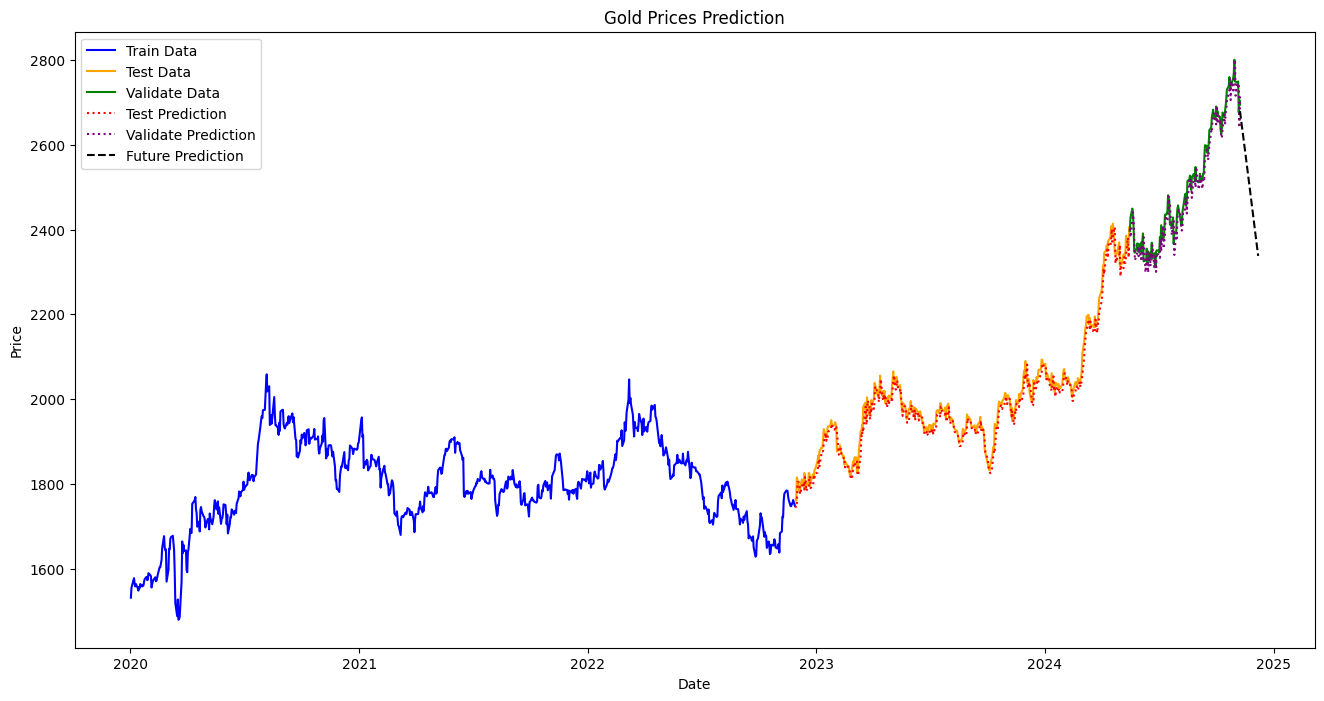

In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['Price'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['Price'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['Price'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

In [ ]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  15.94171603588348
MAPE:  0.7894715376829419
RMSE:  20.37706427629326

** Validate **
MAE:  24.04363064236114
MAPE:  0.9614746223834391
RMSE:  29.05645904198884


# Split dataset (5-3-2)

---



In [ ]:
# Split the data
train_size = int(0.5 * len(sc_train))
test_size = int(0.3 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [ ]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(5, len(train_data)):
    # Append the last 5 values to the x_train array
    x_train.append(sc_train[i-5:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [ ]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [ ]:
# Build the model
model = Sequential()

# Add an GRU layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(GRU(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an GRU layer with 50 units
model.add(GRU(50,return_sequences=True))

# Add an GRU layer with 50 units
model.add(GRU(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
# Changed the file extension to .keras
save_model = 'save_model_5_3_2.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.08570, saving model to save_model_5_3_2.keras
13/13 - 6s - 446ms/step - loss: 0.0857
Epoch 2/80

Epoch 2: loss improved from 0.08570 to 0.03579, saving model to save_model_5_3_2.keras
13/13 - 0s - 22ms/step - loss: 0.0358
Epoch 3/80

Epoch 3: loss improved from 0.03579 to 0.02900, saving model to save_model_5_3_2.keras
13/13 - 0s - 23ms/step - loss: 0.0290
Epoch 4/80

Epoch 4: loss improved from 0.02900 to 0.01843, saving model to save_model_5_3_2.keras
13/13 - 0s - 25ms/step - loss: 0.0184
Epoch 5/80

Epoch 5: loss improved from 0.01843 to 0.01732, saving model to save_model_5_3_2.keras
13/13 - 0s - 22ms/step - loss: 0.0173
Epoch 6/80

Epoch 6: loss did not improve from 0.01732
13/13 - 0s - 13ms/step - loss: 0.0176
Epoch 7/80

Epoch 7: loss did not improve from 0.01732
13/13 - 0s - 24ms/step - loss: 0.0181
Epoch 8/80

Epoch 8: loss did not improve from 0.01732
13/13 - 0s - 14ms/step - loss: 0.0185
Epoch 9/80

Epoch 9: loss did not improve from 0.0

In [ ]:
# Load the best model from the correct file
final_model = load_model('save_model_5_3_2.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [ ]:
# Preprocess the test data
test = df1[len(train_data)-5:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(5, test.shape[0]):
    x_test.append(sc_test[i-5:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
# Preprocess the validate data
val = df1[train_size+test_size-5:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(5, val.shape[0]):
    x_val.append(sc_val[i-5:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [ ]:
# Dự báo dữ liệu test, val
train_predict=model.predict(x_train)
y_pred=model.predict(x_test)
y_pred_val=model.predict(x_val)

# Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=sc.inverse_transform(train_predict)
y_pred=sc.inverse_transform(y_pred)
y_pred_val=sc.inverse_transform(y_pred_val)

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 5:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 5)
[0.9586801876797333, 0.9613288935976989, 0.9057817466323597, 0.9281065536552142, 0.9197820493416073]


In [ ]:
# Initialize variables
lst_output = []
n_steps = 5
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 5):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8678474426269531], [0.8075636029243469], [0.7566125988960266], [0.7178339958190918], [0.6863653063774109], [0.6575164794921875], [0.6297207474708557], [0.6032520532608032], [0.5786337852478027], [0.5560035705566406], [0.5351871848106384], [0.5159398317337036], [0.49807208776474], [0.4814571142196655], [0.4659990966320038], [0.4516114592552185], [0.4382113218307495], [0.42572036385536194], [0.4140670895576477], [0.4031869173049927], [0.3930210471153259], [0.38351625204086304], [0.3746238350868225], [0.3662990927696228], [0.3585011661052704], [0.3511924743652344], [0.3443385660648346], [0.33790770173072815], [0.33187082409858704], [0.32620105147361755]]


In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[2626.17361069]
 [2546.5145449 ]
 [2479.18788818]
 [2427.94584208]
 [2386.36311585]
 [2348.242276  ]
 [2311.51299571]
 [2276.53726318]
 [2244.00668383]
 [2214.10311813]
 [2186.59634601]
 [2161.16289365]
 [2137.55245677]
 [2115.59743073]
 [2095.17120629]
 [2076.15938226]
 [2058.45244067]
 [2041.9468888 ]
 [2026.54825214]
 [2012.17119253]
 [1998.73801166]
 [1986.17837545]
 [1974.42793568]
 [1963.42762119]
 [1953.12344089]
 [1943.46573563]
 [1934.4089812 ]
 [1925.91123707]
 [1917.93410696]
 [1910.44206942]]


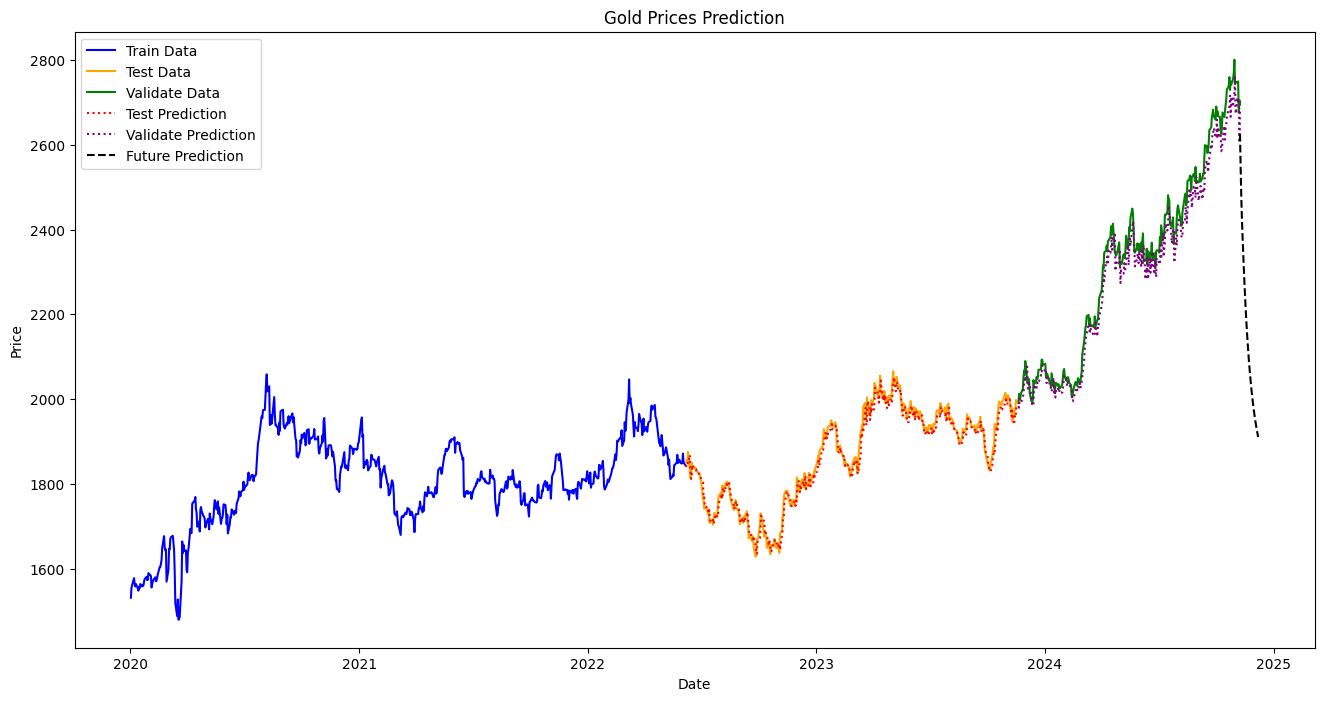

In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['Price'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['Price'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['Price'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

In [ ]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  13.403846383602058
MAPE:  0.7156624247959773
RMSE:  17.636634803453365

** Validate **
MAE:  31.597273017305795
MAPE:  1.3232938325904657
RMSE:  37.78974397136654
